In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from textwrap import wrap


rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
raw_data = pd.read_csv('l1tlbsensitivity.csv')
raw_data

,Benchmark,Baseline,LBPU,LTCU,Valkyrie,Speedup(Prefetch),Speedup(Probing),Speedup(Valkyrie)
0,mt,0.011300,0.008200,0.010240,0.007730,1.378049,1.103516,1.461837
1,mm,0.134300,0.091500,0.128700,0.090100,1.467760,1.043512,1.490566
2,km,0.108400,0.081190,0.051000,0.061400,1.335140,2.125490,1.765472
3,st,0.046400,0.044310,0.039900,0.039100,1.047168,1.162907,1.186701
4,pr,0.104400,0.086520,0.081400,0.079300,1.206657,1.282555,1.316520
5,spmv,0.116000,0.031700,0.086600,0.032700,3.659306,1.339492,3.547401
6,flw,0.062060,0.046500,0.030600,0.030700,1.334624,2.028105,2.021498
7,fir,0.004940,0.004940,0.004940,0.004940,1.000000,1.000000,1.000000
8,bs,0.076300,0.076300,0.076300,0.076300,1.000000,1.000000,1.000000
9,sc,0.000839,0.000839,0.000839,0.000839,1.000000,1.000000,1.000000


In [12]:
stacked_data = raw_data
stacked_data['LBPU'] = stacked_data['Baseline']/stacked_data['LBPU']
stacked_data['LTCU'] = stacked_data['Baseline']/stacked_data['LTCU']
stacked_data['Valkyrie'] = stacked_data['Baseline']/stacked_data['Valkyrie']
stacked_data['Baseline'] = stacked_data['Baseline']/stacked_data['Baseline']


stacked_data = stacked_data.melt(id_vars=['Benchmark'], value_vars=['Baseline', 'LBPU','LTCU','Valkyrie'])
stacked_data['Benchmark'] = stacked_data['Benchmark'].str.upper()
#stacked_data = stacked_data.sort_values(['Benchmark'])
stacked_data.columns = ['Benchmark', 'Configuration', 'Speedup']

stacked_data


,Benchmark,Configuration,Speedup
0,MT,Baseline,1.000000
1,MM,Baseline,1.000000
2,KM,Baseline,1.000000
3,ST,Baseline,1.000000
4,PR,Baseline,1.000000
5,SPMV,Baseline,1.000000
6,FLW,Baseline,1.000000
7,FIR,Baseline,1.000000
8,BS,Baseline,1.000000
9,SC,Baseline,1.000000


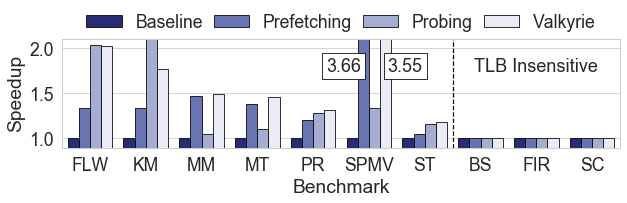

In [13]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.barplot(data=stacked_data, 
            x='Benchmark', hue='Configuration', y='Speedup', 
            order=["FLW", "KM", "MM", "MT", "PR", "SPMV", "ST", "BS", "FIR", "SC"], 
            palette=['#1A237E','#5C6BC0','#9FA8DA', '#E8EAF6' ], ec='k',
            ax=ax)
handles, labels = ax.get_legend_handles_labels()
labels=["Baseline", "Prefetching", "Probing", "Valkyrie"]
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.15), loc=10, ncol=4)
ax.set_ylim(0.9, 2.1)
ax.set_yticks([1.0, 1.5, 2.0])


ax.text(4.55, 1.8, 3.66,  horizontalalignment='center', verticalalignment='center',
        fontsize=18, bbox=dict(facecolor='white', ec='k'))
ax.text(5.65, 1.8, 3.55,  horizontalalignment='center', verticalalignment='center',
        fontsize=18, bbox=dict(facecolor='white', ec='k'))

ax.axvline(6.5, 0, 1, c='k', ls='--')
ax.text(8, 1.8, 'TLB Insensitive',  horizontalalignment='center', verticalalignment='center',
        fontsize=18)



plt.savefig('l1tlbsensitivity.pdf', bbox_inches='tight')
plt.savefig('l1tlbsensitivity.png', dpi=600, bbox_inches='tight')
plt.show()
plt.close()